In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Modules**

In [ ]:
pip install facebook-scraper
from facebook_scraper import *

In [57]:
import pandas as pd
import numpy as np
from statistics import mean
import requests
import json
import pickle
import time
from datetime import date, datetime, timezone, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import io

## **Traffic**

### Load and Save Raw Traffic Dataset



#### Filter Station List

In [3]:
station_info = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/Station Information.csv')
all_years = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/All Years.csv')

In [4]:
station_info.head(5)

,the_geom,station_id,full_name,name,road_name,common_road_name,secondary_name,suburb,post_code,lga,...,link_number,mab_identifier,device_type,permanent_station,vehicle_classifier,road_on_type,road_classification_type,road_classification_admin,wgs84_latitude,wgs84_longitude
0,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,"Sydney Harbour Bridge, North of Hickson Road",Sydney Harbour Bridge,Bradfield Highway,Bradfield Highway,North of Hickson Road,Milsons Point,2061.0,Sydney,...,20,NaN,Trafficorder Dual Tube Classifier,0,1,OnBridge,Highway,State,-33.852116,151.210770
1,0101000020E6100000BB253960D7E66240179CC1DF2FEE...,01003,"Sydney Harbour Tunnel, North of Cahill Expressway",Sydney Harbour Tunnel,Sydney Harbour Tunnel,"Sydney Harbour Tunnel.sydney Harbour Tunnel, S...",North of Cahill Expressway,Sydney,2000.0,Sydney,...,10,M1,Trafficorder Loop Counter,1,0,InTunnel,NaN,State,-33.860836,151.213791
2,0101000020E61000007730629F80E6624082397AFCDEEE...,01004,"Western Distributor, West of Sussex Street",Western Distributor,Western Distributor,"Western.western Distributor, Sydney",West of Sussex Street,Sydney,2000.0,Sydney,...,18,NaN,Trafficorder Loop Counter,1,0,OnBridge,Distributor,State,-33.866180,151.203201
3,0101000020E6100000EA5DBC1FB7E66240982F2FC03EEE...,01011,"Cahill Expressway, East of Pitt Street",Cahill Expressway,Cahill Expressway,"Cahill.cahill Expressway, Sydney",East of Pitt Street,Sydney,2000.0,Sydney,...,180,NaN,Trafficorder Loop Counter,1,0,OnBridge,Expressway,State,-33.861290,151.209854
4,0101000020E61000000F7EE2007AE66240AE62F19BC2F0...,01323,"Ultimo Road, East of Darling Drive",Ultimo Road,Ultimo Road,Ultimo Road,East of Darling Drive,Haymarket,2000.0,Sydney,...,-10,NaN,Trafficorder Tube Axlepair Counter,0,0,OnGround,Road,Local,-33.880939,151.202393


In [5]:
all_years.head(5)

,the_geom,station_id,road_name,suburb,cardinal_direction_name,classification_type,year,period,traffic_count,wgs84_latitude,wgs84_longitude
0,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,NORTH,ALL VEHICLES,2007,ALL DAYS,11741,-33.852116,151.21077
1,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,NORTH,LIGHT VEHICLES,2007,ALL DAYS,9606,-33.852116,151.21077
2,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,NORTH,HEAVY VEHICLES,2007,ALL DAYS,2135,-33.852116,151.21077
3,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,SOUTH,ALL VEHICLES,2007,ALL DAYS,10743,-33.852116,151.21077
4,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,SOUTH,LIGHT VEHICLES,2007,ALL DAYS,8609,-33.852116,151.21077


In [6]:
sydney_stations = list(station_info.loc[(station_info['lga'] == 'Sydney') | (station_info['rms_region'] == 'Sydney')]['station_id'])

In [7]:
sydney_18_23 = []
for station in sydney_stations:
  years = all_years.loc[all_years['station_id'] == station]['year'].unique()
  if(all(year in years for year in [2018, 2019, 2020, 2021, 2022, 2023])):
    sydney_18_23.append(station)

len(sydney_18_23)

85

In [8]:
print(sydney_18_23)

['01004', '02379', '02384', '02413', '03018', '03022', '100001', '10011', '10052', '19065', '22001', '22043', '24014', '24026', '28022', '29005', '32022', '32029', '33013', '33014', '33023', '34028', '36002', '40041', '42001', '50232', '50240', '50260', '51235', '53003', '55049', '55050', '57024', '57025', '6188', '66249', '68025', '7104-PR', '7112', '7119-PR', '7120', '7121', '7123-PR', '7126', '7132', '7139', '7149', '7150', '7153', '7159', '7161', '7162', '7163', '7164', '7168', '7179', '7184', '72027', '7251', '7270', '7272', '7274', '7275', '74228', '74229', '87001', '9658', '9827', '9834-PR', '9836-PR', '9849', 'F3FWY001', 'T0085', 'T0231', 'T0294', 'T0295', 'T0296', 'T0297', 'T0298', 'T0299', 'T0337', 'T0342', 'T0345', 'T0384', 'T0485']


=> Tải dữ liệu của 85 station trên

In [9]:
station_info = station_info.loc[station_info['station_id'].isin(sydney_18_23)]
station_info

,the_geom,station_id,full_name,name,road_name,common_road_name,secondary_name,suburb,post_code,lga,...,link_number,mab_identifier,device_type,permanent_station,vehicle_classifier,road_on_type,road_classification_type,road_classification_admin,wgs84_latitude,wgs84_longitude
2,0101000020E61000007730629F80E6624082397AFCDEEE...,01004,"Western Distributor, West of Sussex Street",Western Distributor,Western Distributor,"Western.western Distributor, Sydney",West of Sussex Street,Sydney,2000.0,Sydney,...,18,NaN,Trafficorder Loop Counter,1,0,OnBridge,Distributor,State,-33.866180,151.203201
30,0101000020E6100000179F02603CE6624080B74082E2EF...,02379,"Western Distributor, West of Allen Street",Western Distributor,Western Distributor,"Western.western Distributor, Pyrmont",West of Allen Street,Pyrmont,2009.0,Sydney,...,45,NaN,Trafficorder Loop Counter,1,0,OnBridge,Distributor,State,-33.874100,151.194870
35,0101000020E6100000CE8B135F6DE662408E93C2BCC7F1...,02384,"Cleveland Street, East of Woodburn Street",Cleveland Street,Cleveland Street,"Cleveland.cleveland St, Redfern",East of Woodburn Street,Redfern,2016.0,Sydney,...,120,NaN,Trafficorder Dual Tube Classifier,1,0,OnGround,Street,State,-33.888908,151.200851
45,0101000020E6100000C77F812040E66240E0D6DD3CD5EF...,02413,"Allen Street, East of Bulwara Road",Allen Street,Allen Street,"Allen.allen St, Pyrmont",East of Bulwara Road,Pyrmont,2009.0,Sydney,...,340,NaN,Trafficorder Loop Counter,1,0,OnGround,Street,State,-33.873695,151.195328
48,0101000020E6100000566133C005E76240DA54DD239BF1...,03018,"Eastern Distributor, South of Anzac Parade",Eastern Distributor,Eastern Distributor,"Anzac.anzac Pde, Surry Hills",South of Anzac Parade,Moore Park,2021.0,Sydney,...,250,NaN,Trafficorder Dual Tube Classifier,1,0,InTunnel,Parade,State,-33.887547,151.219452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,0101000020E610000000FDBE7FF3E162406AA67B9DD4D3...,T0337,"Galston Road, West of Calderwood Road",Galston Road,Galston Road,"Galston.galston Rd, Hornsby Heights",West of Calderwood Road,Galston,2159.0,Hornsby,...,20,NaN,Tirtl,1,1,OnGround,Road,State,-33.654926,151.060974
1767,0101000020E6100000369204E10AE262406B48DC63E9D3...,T0342,"Galston Road, East of Calderwood Road",Galston Road,Galston Road,"Galston.galston Rd, Hornsby Heights",East of Calderwood Road,Galston,2159.0,Hornsby,...,20,NaN,Tirtl,1,1,OnGround,Road,State,-33.655560,151.063828
1768,0101000020E6100000FBE769C020E36240362383DC45D8...,T0345,"Galston Road, South of Clarinda Street",Galston Road,Galston Road,"Galston.galston Rd, Asquith",South of Clarinda Street,Hornsby,2077.0,Hornsby,...,10,NaN,Tirtl,1,1,OnGround,Road,State,-33.689632,151.097748
1769,0101000020E610000094F6065F18C96240C26D6DE179C1...,T0384,"Bells Line Of Road, East of Sandham Road",Bells Line Of Road,Bells Line Of Road,"Bells Line Of Road.bells Line Of Rd, Bell",East of Sandham Road,Bell,2786.0,Blue Mountains,...,565,B59,Tirtl,1,1,OnGround,NaN,State,-33.511532,150.284225


#### Merge raw traffic dataframe

In [10]:
traffic_df = pd.date_range(start = '2018-06-01 00:00:00', end = '2023-05-31 23:00:00', freq = 'H').strftime("%Y-%m-%d %H:%M:%S").to_frame().reset_index(drop = True)
traffic_df.columns = ['datetime']
traffic_df['datetime'] = pd.to_datetime(traffic_df['datetime'])
traffic_df

,datetime
0,2018-06-01 00:00:00
1,2018-06-01 01:00:00
2,2018-06-01 02:00:00
3,2018-06-01 03:00:00
4,2018-06-01 04:00:00
...,...
43819,2023-05-31 19:00:00
43820,2023-05-31 20:00:00
43821,2023-05-31 21:00:00
43822,2023-05-31 22:00:00


In [11]:
for station in station_info['station_id']:
  df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/raw/{}.csv'.format(station))
  df = df.loc[df['classification_seq'] == 'All Vehicles']
  df = df.drop(['year', 'cardinal_direction_seq', 'classification_seq', 'public_holiday', 'school_holiday'], axis = 1)
  df = df.groupby('date').sum()
  df.columns = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
                      '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
  df = df.stack().to_frame().reset_index()
  df.columns = ['date', 'time', '{}'.format(station)]
  df['datetime'] = df['date'] + ' ' + df['time']
  df = df[['datetime', '{}'.format(station)]]
  df['datetime'] = pd.to_datetime(df['datetime'])
  traffic_df = traffic_df.merge(df, how = 'left', on = 'datetime')

<ipython-input-11-76c4078f024a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])
<ipython-input-11-76c4078f024a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


In [12]:
traffic_df = traffic_df.set_index('datetime')
traffic_df = traffic_df.iloc[401*24 : (401+1096)*24,:]
traffic_df

,01004,02379,02384,02413,03018,03022,100001,10011,10052,19065,...,T0295,T0296,T0297,T0298,T0299,T0337,T0342,T0345,T0384,T0485
datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-07 00:00:00,880.0,953.0,590.0,140.0,507.0,286.0,NaN,1428.0,1226.0,1544.0,...,1.0,1.0,1.0,65.0,35.0,39.0,38.0,164.0,7.0,66.0
2019-07-07 01:00:00,562.0,734.0,411.0,90.0,351.0,215.0,NaN,1054.0,888.0,1170.0,...,1.0,1.0,0.0,46.0,27.0,21.0,20.0,89.0,1.0,44.0
2019-07-07 02:00:00,433.0,508.0,315.0,77.0,304.0,146.0,NaN,941.0,686.0,948.0,...,1.0,1.0,0.0,22.0,11.0,15.0,15.0,48.0,6.0,22.0
2019-07-07 03:00:00,341.0,370.0,265.0,73.0,199.0,116.0,NaN,639.0,531.0,747.0,...,1.0,1.0,0.0,26.0,14.0,12.0,13.0,28.0,0.0,31.0
2019-07-07 04:00:00,296.0,291.0,206.0,100.0,140.0,100.0,NaN,335.0,337.0,623.0,...,3.0,3.0,3.0,30.0,18.0,7.0,7.0,33.0,3.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06 19:00:00,1387.0,1601.0,804.0,323.0,1212.0,455.0,1591.0,1486.0,1574.0,2572.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-06 20:00:00,1013.0,1255.0,659.0,228.0,839.0,396.0,1241.0,1210.0,1178.0,2327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-06 21:00:00,1100.0,1130.0,592.0,231.0,838.0,363.0,1081.0,1110.0,1084.0,2169.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check number of missing values => Drop columns

In [13]:
missing_dates = (traffic_df.isna().sum()/24)
missing_dates.sort_values(ascending=False)

87001      611.0
T0294      525.0
50260      387.0
T0295      335.0
10052      335.0
           ...  
7275        59.0
24014       51.0
9834-PR     49.0
22001       47.0
40041       38.0
Length: 85, dtype: float64

(array([33., 28., 10.,  4.,  4.,  3.,  1.,  0.,  1.,  1.]),
 array([ 38. ,  95.3, 152.6, 209.9, 267.2, 324.5, 381.8, 439.1, 496.4,
        553.7, 611. ]),
 <BarContainer object of 10 artists>)

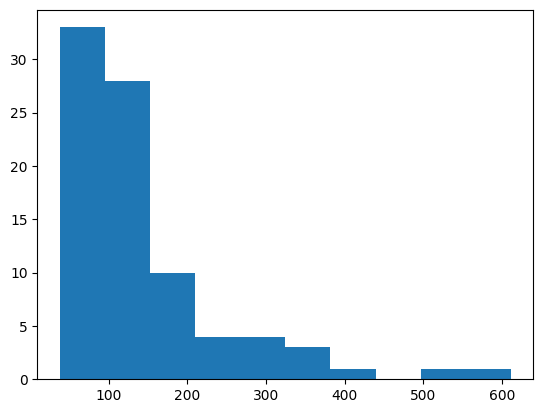

In [16]:
plt.hist(missing_dates.values)

=> Drop stations that have number of missing dates bigger than 200 days

In [18]:
station_ids = missing_dates.loc[missing_dates <= 200].index.tolist()
print(len(station_ids))
print(station_ids)

70
['01004', '02384', '02413', '03022', '100001', '10011', '19065', '22001', '22043', '24014', '24026', '28022', '29005', '32022', '33013', '33014', '33023', '36002', '40041', '42001', '50232', '50240', '51235', '53003', '55049', '57025', '6188', '66249', '68025', '7104-PR', '7112', '7119-PR', '7120', '7121', '7123-PR', '7126', '7132', '7139', '7149', '7150', '7153', '7159', '7161', '7162', '7163', '7164', '7168', '7179', '7184', '72027', '7251', '7270', '7272', '7274', '7275', '74228', '74229', '9658', '9827', '9834-PR', '9836-PR', '9849', 'F3FWY001', 'T0085', 'T0231', 'T0298', 'T0299', 'T0345', 'T0384', 'T0485']


In [19]:
traffic_df = traffic_df[station_ids]
traffic_df.shape

(26304, 70)

In [20]:
missing_dates = (traffic_df.isna().sum()/24)
missing_dates.sort_values(ascending=False)

T0085      195.0
7126       194.0
7251       188.0
7112       179.0
33023      171.0
           ...  
7275        59.0
24014       51.0
9834-PR     49.0
22001       47.0
40041       38.0
Length: 70, dtype: float64

(array([ 4.,  9., 13., 11.,  8., 12.,  3.,  2.,  5.,  3.]),
 array([ 38. ,  53.7,  69.4,  85.1, 100.8, 116.5, 132.2, 147.9, 163.6,
        179.3, 195. ]),
 <BarContainer object of 10 artists>)

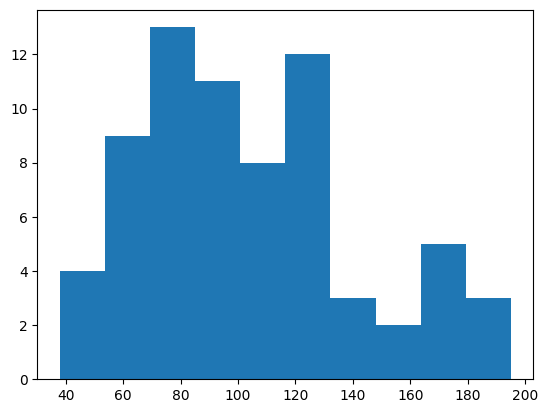

In [21]:
plt.hist(missing_dates.values)

#### Check stations' location => Drop columns

In [22]:
m = folium.Map(location=[-33.80902697767413, 151.00753632525044], tiles="OpenStreetMap", zoom_start=10)
for i in range(0,len(station_info)):
   folium.Marker(
      location=[station_info.iloc[i]['wgs84_latitude'], station_info.iloc[i]['wgs84_longitude']],
      popup=station_info.iloc[i]['station_id'],
   ).add_to(m)

# Show the map again
m

=> Drop stations that far from the center

In [23]:
far_stations = ['6188', 'T0298', 'T0299', 'T0384', 'T0485']
station_ids = [id for id in station_ids if id not in far_stations]
len(station_ids)

65

In [24]:
station_info = station_info.loc[station_info['station_id'].isin(station_ids)]
station_info.shape

(65, 24)

#### Final Raw Traffic Dataset

In [25]:
traffic_df = traffic_df[station_ids]
traffic_df.shape

(26304, 65)

In [26]:
traffic_df.head(5)

,01004,02384,02413,03022,100001,10011,19065,22001,22043,24014,...,74229,9658,9827,9834-PR,9836-PR,9849,F3FWY001,T0085,T0231,T0345
datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-07 00:00:00,880.0,590.0,140.0,286.0,NaN,1428.0,1544.0,2222.0,96.0,947.0,...,371.0,254.0,200.0,256.0,1058.0,272.0,688.0,36.0,400.0,164.0
2019-07-07 01:00:00,562.0,411.0,90.0,215.0,NaN,1054.0,1170.0,1438.0,54.0,614.0,...,174.0,158.0,135.0,194.0,751.0,173.0,347.0,18.0,297.0,89.0
2019-07-07 02:00:00,433.0,315.0,77.0,146.0,NaN,941.0,948.0,1020.0,31.0,495.0,...,124.0,95.0,100.0,95.0,633.0,97.0,265.0,12.0,255.0,48.0
2019-07-07 03:00:00,341.0,265.0,73.0,116.0,NaN,639.0,747.0,922.0,18.0,454.0,...,93.0,90.0,51.0,91.0,488.0,73.0,276.0,9.0,196.0,28.0
2019-07-07 04:00:00,296.0,206.0,100.0,100.0,NaN,335.0,623.0,710.0,16.0,400.0,...,94.0,96.0,32.0,54.0,394.0,73.0,446.0,8.0,170.0,33.0


In [27]:
#traffic_df.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/raw_traffic.csv')

In [31]:
#station_info.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/final_station_info.csv', index = False)

### Create Distance Dataframe and Adjacent Matrix

In [35]:
station_info = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/final_station_info.csv')
station_info = station_info[['station_id', 'wgs84_latitude', 'wgs84_longitude']]
station_info.columns = ['station_id', 'lat', 'lon']
station_info['coordinates'] = station_info['lat'].astype(str) + ',' +station_info['lon'].astype(str)
station_info.shape

(65, 4)

In [36]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station_id   65 non-null     object 
 1   lat          65 non-null     float64
 2   lon          65 non-null     float64
 3   coordinates  65 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.2+ KB


In [37]:
df = station_info[['station_id', 'coordinates']]
df = df.set_index('station_id', drop=True)
station_dict = df.T.to_dict('list')
station_dict

{'01004': ['-33.86618,151.203201'],
 '02384': ['-33.888908,151.200851'],
 '02413': ['-33.873695,151.195328'],
 '03022': ['-33.894791,151.220764'],
 '100001': ['-33.878181,150.924942'],
 '10011': ['-33.876652,151.230606'],
 '19065': ['-33.887417,151.173325'],
 '22001': ['-33.825577,151.233261'],
 '22043': ['-33.822067,151.238358'],
 '24014': ['-33.928268,151.077286'],
 '24026': ['-33.934917,151.0737'],
 '28022': ['-33.887241,151.073135'],
 '29005': ['-33.824696,151.093216'],
 '32022': ['-33.812298,151.170197'],
 '33013': ['-33.787891,151.179306'],
 '33014': ['-33.806141,151.17952'],
 '33023': ['-33.799751,151.210465'],
 '36002': ['-34.011719,151.126007'],
 '40041': ['-33.984394,151.109436'],
 '42001': ['-33.977142,151.030533'],
 '50232': ['-33.802933,151.066223'],
 '50240': ['-33.796436,150.987595'],
 '51235': ['-33.81551,151.101105'],
 '53003': ['-33.729225,151.122208'],
 '55049': ['-33.729507,151.30011'],
 '57025': ['-33.725773,151.219788'],
 '66249': ['-33.869324,150.963486'],
 '6802

In [38]:
from_id = []
to_id = []
for i in range(len(station_info)):
  for j in range(len(station_info)):
    from_id.append(station_info['station_id'][i])
    to_id.append(station_info['station_id'][j])

df1 = pd.DataFrame()
df1_len = len(station_dict)*len(station_dict)
#df1['corr'] = x
df1['from'] = from_id
df1['to']= to_id
df1['origin'] = [None]*df1_len
df1['destination'] = [None]*df1_len
df1['distance'] = [None]*df1_len

ori = []
for item in df1['from']:
    if item in station_dict.keys():
        ori.append(station_dict[item])
    else:
        ori.append(item)
df1['origin'] = ori
df1['origin'] =df1['origin'].apply(lambda x: ' '.join(dict.fromkeys(x).keys()))

des = []
for item in df1['to']:
    if item in station_dict.keys():
        des.append(station_dict[item])
    else:
        des.append(item)
df1['destination'] = des
df1['destination'] = df1['destination'].apply(lambda x: ' '.join(dict.fromkeys(x).keys()))

df1

,from,to,origin,destination,distance
0,01004,01004,"-33.86618,151.203201","-33.86618,151.203201",None
1,01004,02384,"-33.86618,151.203201","-33.888908,151.200851",None
2,01004,02413,"-33.86618,151.203201","-33.873695,151.195328",None
3,01004,03022,"-33.86618,151.203201","-33.894791,151.220764",None
4,01004,100001,"-33.86618,151.203201","-33.878181,150.924942",None
...,...,...,...,...,...
4220,T0345,9849,"-33.689632,151.097748","-33.877975,151.093185",None
4221,T0345,F3FWY001,"-33.689632,151.097748","-33.694206,151.121323",None
4222,T0345,T0085,"-33.689632,151.097748","-33.665455,151.090271",None
4223,T0345,T0231,"-33.689632,151.097748","-33.838615,151.143753",None


In [39]:
api_link1 = [f'https://api.distancematrix.ai/maps/api/distancematrix/json?origins={s}' for s in df1['origin']]
api_link2 = [f'&destinations={y}&departure_time=now&key=Fpiu05bdqDvy2O03HPKb5VocbagNQ' for y in df1['destination']]
from functools import reduce
api_link = reduce(lambda res, l: res + [l[0] + "" + l[1]], zip(api_link1, api_link2), [])

response_API = [requests.get(x) for x in api_link]
x = [response.json() for response in response_API]

In [40]:
x

[{'destination_addresses': ['Sussex St before Erskine St, Sydney NSW 2000, Australia'],
  'origin_addresses': ['Sussex St before Erskine St, Sydney NSW 2000, Australia'],
  'rows': [{'elements': [{'duration_in_traffic': {'text': '1 min', 'value': 0},
      'origin': '-33.86618,151.203201',
      'destination': '-33.86618,151.203201',
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Hotel Hacienda, 179 Cleveland St, Redfern NSW 2016, Australia'],
  'origin_addresses': ['Sussex St before Erskine St, Sydney NSW 2000, Australia'],
  'rows': [{'elements': [{'distance': {'text': '4 km', 'value': 3963},
      'duration': {'text': '9 mins', 'value': 557},
      'duration_in_traffic': {'text': '10 mins', 'value': 628},
      'origin': '-33.86618,151.203201',
      'destination': '-33.888908,151.200851',
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Unit 2 A/4 Ada Pl, Pyrmont NSW 2009, Australia'],
  'origin_addresses': ['Sussex St before Ersk

In [41]:
dis =[]
for i in x:
  if (i['rows'][0]['elements'][0].get('distance') == None):
    d = 0
  else:
    d = i['rows'][0]['elements'][0]['distance']['value']
  dis.append(d/1000)
df1['distance'] = dis

In [42]:
df1

,from,to,origin,destination,distance
0,01004,01004,"-33.86618,151.203201","-33.86618,151.203201",0.000
1,01004,02384,"-33.86618,151.203201","-33.888908,151.200851",3.963
2,01004,02413,"-33.86618,151.203201","-33.873695,151.195328",1.670
3,01004,03022,"-33.86618,151.203201","-33.894791,151.220764",5.062
4,01004,100001,"-33.86618,151.203201","-33.878181,150.924942",34.478
...,...,...,...,...,...
4220,T0345,9849,"-33.689632,151.097748","-33.877975,151.093185",36.340
4221,T0345,F3FWY001,"-33.689632,151.097748","-33.694206,151.121323",5.076
4222,T0345,T0085,"-33.689632,151.097748","-33.665455,151.090271",3.056
4223,T0345,T0231,"-33.689632,151.097748","-33.838615,151.143753",22.306


In [43]:
distances_df = df1[['from', 'to', 'distance']]
distances_df

,from,to,distance
0,01004,01004,0.000
1,01004,02384,3.963
2,01004,02413,1.670
3,01004,03022,5.062
4,01004,100001,34.478
...,...,...,...
4220,T0345,9849,36.340
4221,T0345,F3FWY001,5.076
4222,T0345,T0085,3.056
4223,T0345,T0231,22.306


In [44]:
distances_df.isna().sum().sum()

0

In [45]:
id_to_idx = (station_info.reset_index())[['station_id', 'index']]
id_to_idx = id_to_idx.set_index('station_id', drop=True)
id2idx = id_to_idx.T.to_dict('records')[0]
id2idx

{'01004': 0,
 '02384': 1,
 '02413': 2,
 '03022': 3,
 '100001': 4,
 '10011': 5,
 '19065': 6,
 '22001': 7,
 '22043': 8,
 '24014': 9,
 '24026': 10,
 '28022': 11,
 '29005': 12,
 '32022': 13,
 '33013': 14,
 '33014': 15,
 '33023': 16,
 '36002': 17,
 '40041': 18,
 '42001': 19,
 '50232': 20,
 '50240': 21,
 '51235': 22,
 '53003': 23,
 '55049': 24,
 '57025': 25,
 '66249': 26,
 '68025': 27,
 '7104-PR': 28,
 '7112': 29,
 '7119-PR': 30,
 '7120': 31,
 '7121': 32,
 '7123-PR': 33,
 '7126': 34,
 '7132': 35,
 '7139': 36,
 '7149': 37,
 '7150': 38,
 '7153': 39,
 '7159': 40,
 '7161': 41,
 '7162': 42,
 '7163': 43,
 '7164': 44,
 '7168': 45,
 '7179': 46,
 '7184': 47,
 '72027': 48,
 '7251': 49,
 '7270': 50,
 '7272': 51,
 '7274': 52,
 '7275': 53,
 '74228': 54,
 '74229': 55,
 '9658': 56,
 '9827': 57,
 '9834-PR': 58,
 '9836-PR': 59,
 '9849': 60,
 'F3FWY001': 61,
 'T0085': 62,
 'T0231': 63,
 'T0345': 64}

In [46]:
for i in range(len(distances_df)):
  distances_df['from'][i] = id2idx[distances_df['from'][i]]
  distances_df['to'][i] = id2idx[distances_df['to'][i]]

distances_df

<ipython-input-46-336421dcaa9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distances_df['from'][i] = id2idx[distances_df['from'][i]]
<ipython-input-46-336421dcaa9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distances_df['to'][i] = id2idx[distances_df['to'][i]]


,from,to,distance
0,0,0,0.000
1,0,1,3.963
2,0,2,1.670
3,0,3,5.062
4,0,4,34.478
...,...,...,...
4220,64,60,36.340
4221,64,61,5.076
4222,64,62,3.056
4223,64,63,22.306


In [47]:
#distances_df.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/distance.csv', index = False)

In [49]:
adj_matrix = distances_df.pivot(index = 'from', columns = 'to', values = 'distance')
adj_matrix = adj_matrix.rename_axis(None, axis=1)
adj_matrix = adj_matrix.rename_axis(None, axis=0)
adj_matrix

<ipython-input-49-c9d8d75baa67>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  adj_matrix = distances_df.pivot(index = 'from', columns = 'to', values = 'distance')
<ipython-input-49-c9d8d75baa67>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  adj_matrix = distances_df.pivot(index = 'from', columns = 'to', values = 'distance')


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.000,3.963,1.670,5.062,34.478,5.527,4.504,8.434,9.251,16.089,...,22.775,25.458,29.596,29.101,12.048,14.609,36.414,37.352,9.729,34.295
1,9.803,0.000,2.076,2.691,33.533,6.376,3.094,9.760,10.577,17.974,...,24.101,24.513,30.922,21.854,12.335,12.436,37.740,38.678,10.016,35.621
2,8.083,2.822,0.000,3.921,33.146,5.385,3.200,8.040,8.857,13.727,...,22.381,31.205,29.202,28.959,10.716,13.277,36.020,36.958,8.397,33.901
3,12.146,2.004,4.080,0.000,35.536,3.638,5.098,9.879,10.696,21.008,...,24.220,33.044,31.041,24.348,22.034,14.440,37.859,38.797,13.073,35.740
4,40.847,37.665,32.816,41.247,0.000,37.498,31.377,40.804,41.621,24.336,...,23.543,16.434,55.729,37.473,28.630,24.407,32.140,36.630,31.109,33.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,19.681,17.400,12.550,18.428,24.332,16.332,10.241,19.638,20.455,7.432,...,15.147,15.312,38.363,21.091,10.639,0.000,28.704,29.047,11.072,25.990
61,27.113,31.076,28.783,32.537,32.106,30.685,31.617,24.836,25.654,39.572,...,11.636,17.165,28.620,54.016,19.875,34.909,0.000,7.858,21.113,4.802
62,31.362,35.325,33.032,36.786,36.593,34.934,35.866,29.085,29.903,44.059,...,14.758,21.652,31.049,58.265,23.608,39.396,8.132,0.000,25.362,3.056
63,14.219,10.468,7.646,14.424,31.497,12.328,8.462,11.942,12.760,16.575,...,15.041,23.864,26.690,35.902,3.946,10.590,28.679,29.619,0.000,26.562


In [54]:
#adj_matrix.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/adj_matrix.csv', index = False)

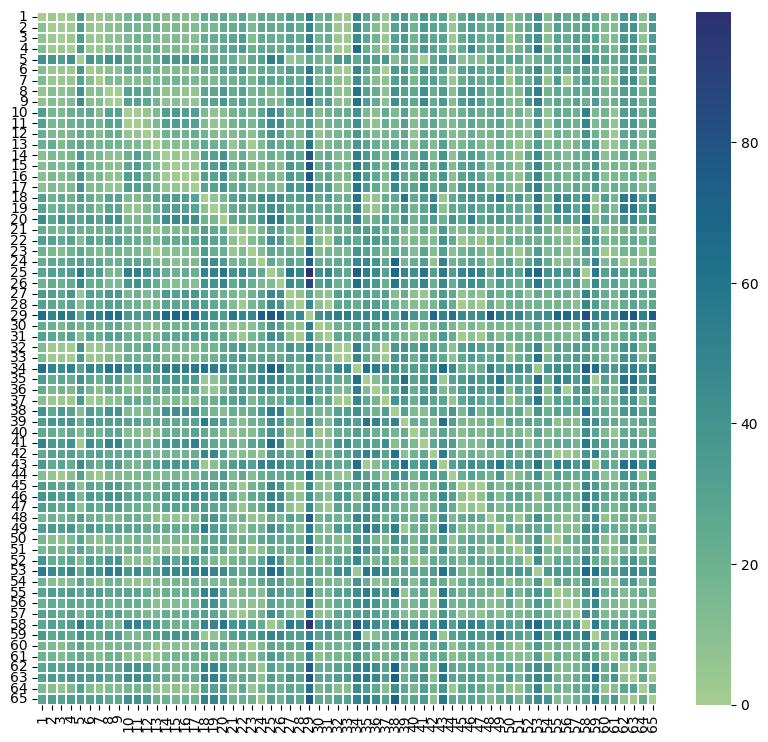

In [58]:
plt.figure(figsize=(10, 9))
ax = sns.heatmap(adj_matrix, cmap="crest", linewidth = 0.1,
                 xticklabels = list(range(1,66)), yticklabels = list(range(1,66)))
plt.show()

In [59]:
np.count_nonzero(adj_matrix)

4157

## **Weather**

In [60]:
station_info = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/final_station_info.csv')
station_info = station_info[['station_id', 'wgs84_latitude', 'wgs84_longitude']]
station_info

,station_id,wgs84_latitude,wgs84_longitude
0,01004,-33.866180,151.203201
1,02384,-33.888908,151.200851
2,02413,-33.873695,151.195328
3,03022,-33.894791,151.220764
4,100001,-33.878181,150.924942
...,...,...,...
60,9849,-33.877975,151.093185
61,F3FWY001,-33.694206,151.121323
62,T0085,-33.665455,151.090271
63,T0231,-33.838615,151.143753


In [61]:
start = '2019-07-07'
end = '2022-07-06'

for i in range(len(station_info)):
  station_id = station_info.loc[i, 'station_id']
  lat = round(station_info.loc[i, 'wgs84_latitude'], 4)
  lon = round(station_info.loc[i, 'wgs84_longitude'], 4)

  api = 'https://archive-api.open-meteo.com/v1/archive?latitude={}&longitude={}2&start_date={}&end_date={}&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,weathercode,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm'.format(lat, lon, start, end)
  res = json.loads(requests.get(api).text)

  columns = list(res['hourly_units'].keys())
  values = res['hourly']

  dict_columns = {}
  for col in columns:
    dict_columns[col] = values[col]

  weather = pd.DataFrame(dict_columns)
  weather.rename(columns = {'time':'datetime'}, inplace = True)
  weather['datetime'] = pd.to_datetime(weather['datetime'])
  weather.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/raw/{}.csv'.format(station_id))

## **News**

In [ ]:
def json_serial(obj):
    """JSON serializer for objects not serializable by default json code"""

    if isinstance(obj, (datetime, date)):
        return obj.isoformat()
    raise TypeError ("Type %s not serializable" % type(obj))

In [ ]:
timezone_offset = 7.0
tzinfo = timezone(timedelta(hours=timezone_offset))

results = []
count_post = 0
start_url = None
def handle_pagination_url(url):
    global start_url
    start_url = url
set_cookies("cookies.txt")
#start = time.time()
while True:
    try:
        for post in get_posts("livetrafficnsw", cookies="cookies.txt", page_limit=None, timeout=60, \
                              options={"allow_extra_requests": False, "posts_per_page": 200},\
                              extra_info=False, start_url=start_url, request_url_callback=handle_pagination_url):
          print('⸻⸻' * 25)
          if post['time'] < datetime(2012,7,1):
            break
          count_post += 1
          results.append(post)
          print(f"{count_post} posts retrieved at {datetime.now(tzinfo).strftime('%d/%m/%Y %H:%M:%S')}. Time of Oldest post retrieved : {post['time'].strftime('%d/%m/%Y %H:%M:%S')}" )
        print("All done")
        with open('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/News/raw_news.txt', 'a') as f:
            f.write(json.dumps(results, default=json_serial ))
        f.close()
        break
    except exceptions.TemporarilyBanned:
        print(f"Temporarily Banned. Sleep for 10 minutes")
        time.sleep(600)